In [5]:
import pandas as pd 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import cycle
import os


In [8]:
# Loading the data
train_metadata =pd.read_csv('training_set_metadata.csv') # For the moment we just take the target from it 
train_data = pd.read_csv('training_set.csv')


In [9]:
def aggregate_by_list(x):
    return list(x)

targets_samples = train_metadata[['object_id','target']].groupby('target').agg({'object_id':aggregate_by_list})


In [10]:
# With KMeans
n_clusters = 3
start = datetime.now()
km = KMeans(n_clusters)
km.fit(train_data.loc[train_data['object_id'] == 615,'mjd'].reshape(-1,1))
object_615 = train_data.loc[train_data['object_id'] == 615]
clusters_615 = km.predict(object_615['mjd'].reshape(-1,1))
object_615 = object_615.assign(cluster=clusters)

end = datetime.now()

print("Elapsed time:",end-start)

colors = cycle('bgrc')
for k, col in zip(range(n_clusters), colors):
    plt.plot(object_615.loc[object_615['cluster'] == k, 'mjd'], object_615.loc[object_615['cluster'] == k, 'flux'],
             color = col,marker='.',linestyle='None')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


NameError: name 'clusters' is not defined

In [11]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = [name for name, _ in colors.items()]

n_clusters 5
Elapsed time: 0:00:00.006698


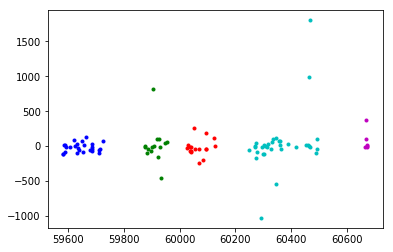

In [12]:
# With DBSCAN
start = datetime.now()
dbs = DBSCAN(eps=50)
object_615_dbs = train_data.loc[train_data['object_id'] == 102386526]
clusters_615_dbs = dbs.fit_predict(train_data.loc[train_data['object_id'] == 102386526,'mjd'].values.reshape(-1,1))
object_615_dbs = object_615_dbs.assign(cluster=clusters_615_dbs)
n_clusters = object_615_dbs['cluster'].nunique()
print("n_clusters",n_clusters)
end = datetime.now()
print("Elapsed time:",end-start)

colors = cycle('bgrcm')
for k, col in zip(range(n_clusters), colors):
    plt.plot(object_615_dbs.loc[object_615_dbs['cluster'] == k, 'mjd'],
             object_615_dbs.loc[object_615_dbs['cluster'] == k, 'flux'],
             color=col,marker='.',linestyle='None')

In [14]:
# Loading the data
train_metadata =pd.read_csv('training_set_metadata.csv') # For the moment we just take the target from it 
train_data = pd.read_csv('training_set.csv')

start = datetime.now()
dbs = DBSCAN(eps=50)
train_data.assign(cluster=None)
for i,obj in enumerate(train_data['object_id'].unique()):  
    if i%100==0:
        print(i)
    cur_object = train_data['object_id'] == obj
    df_cur_object = train_data.loc[cur_object]
    clusters_cur_object = dbs.fit_predict(df_cur_object['mjd'].values.reshape(-1,1))
    train_data.loc[cur_object,'cluster'] = clusters_cur_object

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800


In [15]:
train_data['cluster_color'] = ""
colors = cycle('rgbcmk')
for clu,col in zip(train_data['cluster'].unique(),colors):
    train_data.loc[train_data['cluster'] == clu,'cluster_color'] = col

In [16]:
def plot_clusters(df, target, n_to_print=None):
        '''Plot the multiband light curve'''
    
        path = 'clusterized_plot_target_' + str(target) + '/'
        if not os.path.exists(path):
            os.mkdir(path)
        
        if n_to_print is None: 
            n_to_print = len(targets_samples.loc[target][0])

        bloc_size = 9
        n_blocs = n_to_print//bloc_size
        print("n_blocs:",n_blocs)
        n_rows = bloc_size//3
        print("n_rows:",n_rows)

        for bloc in range(n_blocs):
            print("bloc:",bloc)
            fig, ax = plt.subplots(n_rows,3,figsize=(1.5*50,50))
                  
            for  k in range(bloc_size):
                r = k // 3
                c = k % 3   
                object_id = list(targets_samples.loc[target][0])[k+bloc*bloc_size-1]
                df_to_plot = df.loc[df['object_id']== object_id]

                ax[r,c].errorbar(df_to_plot['mjd'], 
                                df_to_plot['flux'],
                                df_to_plot['flux_err'],
                                ecolor=df_to_plot['cluster_color'],
                                fmt = 'o', markersize=2)
                s=[250 for i in range(len(df_to_plot))]                 
                ax[r,c].scatter(df_to_plot['mjd'], 
                                df_to_plot['flux'],
                                color=df_to_plot['cluster_color'],marker='o', s=s)
                ax[r,c].legend(['flux','flux_error'],ncol = 4, frameon = True,fontsize=25)

                ax[r,c].set_xlabel(f'mjd', fontsize=30)
                ax[r,c].set_ylabel('Flux', fontsize=30)
                ax[r,c].xaxis.set_tick_params(labelsize=30)
                ax[r,c].yaxis.set_tick_params(labelsize=30)
                fig.tight_layout(rect=[0, 0, 1, 0.97])
            plt.savefig(path + 'n_to_print_' + str(n_to_print)+'_bloc_'+str(bloc))
              

In [17]:
def aggregate_by_list(x):
    return list(x)

targets_samples = train_metadata[['object_id','target']].groupby('target').agg({'object_id':aggregate_by_list})


In [ ]:
%matplotlib agg
%matplotlib agg
for target in targets_samples.index:
    print(target)
    plot_clusters(train_data,target)

6
n_blocs: 16
n_rows: 3
bloc: 0
bloc: 1
bloc: 2
bloc: 3
bloc: 4
bloc: 5
bloc: 6
bloc: 7
bloc: 8
bloc: 9
bloc: 10
bloc: 11
bloc: 12
bloc: 13
bloc: 14
bloc: 15
15
n_blocs: 55
n_rows: 3
bloc: 0
bloc: 1
bloc: 2
bloc: 3
bloc: 4


/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


bloc: 5
bloc: 6
bloc: 7
bloc: 8
bloc: 9
bloc: 10
bloc: 11
bloc: 12
bloc: 13
bloc: 14
bloc: 15
bloc: 16
bloc: 17
bloc: 18
bloc: 19
bloc: 20
bloc: 21
bloc: 22
bloc: 23
bloc: 24
bloc: 25
bloc: 26
bloc: 27
bloc: 28
bloc: 29
bloc: 30
bloc: 31
bloc: 32
bloc: 33
bloc: 34
bloc: 35
bloc: 36
bloc: 37
bloc: 38
bloc: 39
bloc: 40
bloc: 41
bloc: 42
bloc: 43
bloc: 44
bloc: 45
bloc: 46
bloc: 47
bloc: 48
bloc: 49
bloc: 50
bloc: 51
bloc: 52
bloc: 53
bloc: 54
16
n_blocs: 102
n_rows: 3
bloc: 0
bloc: 1
bloc: 2
bloc: 3
bloc: 4
bloc: 5
bloc: 6
bloc: 7
bloc: 8
bloc: 9
bloc: 10
bloc: 11
bloc: 12
bloc: 13
bloc: 14
bloc: 15
bloc: 16
bloc: 17
bloc: 18
bloc: 19
bloc: 20
bloc: 21
bloc: 22
bloc: 23
bloc: 24
bloc: 25
bloc: 26
bloc: 27
bloc: 28
bloc: 29
bloc: 30
bloc: 31
bloc: 32
bloc: 33
bloc: 34
bloc: 35
bloc: 36
bloc: 37
bloc: 38
bloc: 39
bloc: 40
bloc: 41
bloc: 42
bloc: 43
bloc: 44
bloc: 45
bloc: 46
bloc: 47
bloc: 48
bloc: 49
bloc: 50
bloc: 51
bloc: 52
bloc: 53
bloc: 54
bloc: 55
bloc: 56
bloc: 57
bloc: 58
bloc: 59